In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import utils
import algorithms as algo


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

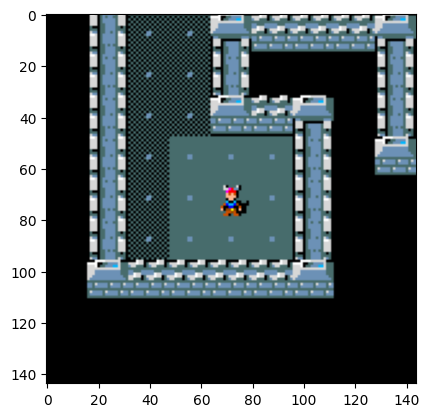

In [2]:
env = gym.make("MiniHack-Navigation-Custom-v0", observation_keys=("chars", "pixel_crop"), des_file="complex_maze.des")
state = env.reset()
env.render()
plt.imshow(state["pixel_crop"])
game_map = state["chars"]
game = state["pixel_crop"]

In [3]:
start = utils.get_player_location(game_map)
target = utils.get_target_location(game_map)
print(start)
print(target)

(14, 23)
(14, 57)


In [4]:
path = algo.a_star(game_map, start, target, utils.manhattan_distance)
print(path)

Target found!
[(14, 23), (14, 22), (13, 22), (12, 22), (11, 22), (10, 22), (9, 22), (9, 23), (9, 24), (9, 25), (9, 26), (9, 27), (9, 28), (9, 29), (9, 30), (9, 31), (9, 32), (9, 33), (9, 34), (9, 35), (9, 36), (9, 37), (8, 37), (7, 37), (6, 37), (5, 37), (4, 37), (4, 38), (4, 39), (4, 40), (4, 41), (4, 42), (4, 43), (5, 43), (6, 43), (7, 43), (8, 43), (9, 43), (10, 43), (11, 43), (12, 43), (12, 44), (12, 45), (12, 46), (12, 47), (12, 48), (12, 49), (12, 50), (12, 51), (12, 52), (12, 53), (12, 54), (12, 55), (13, 55), (14, 55), (14, 56), (14, 57)]


In [5]:
actions = utils.actions_from_path(start, path[1:])
print(actions)

[3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1]


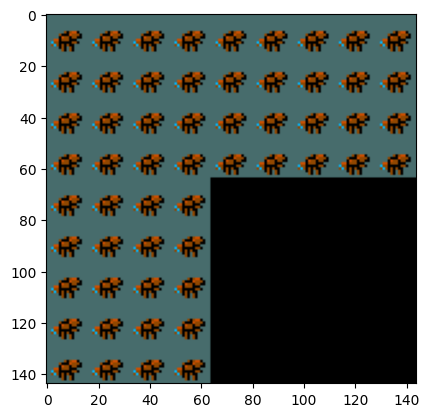

In [6]:
import time
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s["pixel_crop"])